# Machine learning - Regressie (Housing price)

- Created by: Harmohat Khangura
- Date: 10/03/2023
- Version: 1.0

**overview**

- 1 What is the problem?
- 2 Prediction
- 3 Get the data
  - 3.1 Importing the 'Housing Prices' dataset
  - 3.2 Printing data information
  - 3.3 What have I observed?
- 4 Visualize data
  - 4.1 Function to display subplots
  - 4.2 Displaying the subplots of the dataframe
- 5 Clean and prepare data
  - 5.1 Replacing the string value with numerical values
  - 5.2 Reshaping the furnishing status for the OneHotEncoder in the next step
  - 5.3 Using the `OneHotEncoder` for the categorical labels
  - 5.4 Displaying the first 10 rows
  - 5.4 Split Data into Train, Test
- 6 RP Visualize data 
  - 6.1 Displaying the subplots of the dataframe
  - 6.2 Correlation matrix 
  - 6.3 Heatmap
- 7-`LR` Select and set model
- 7-`DTR` Select and set model
- 8-`LR` Train and test model
- 8-`DTR` Train and test model
- 9. Improve model 
  - 9.1 Linear Regression
  - 9.2 Decision Tree Regression
- 10-`LR` Evaluate results
  - 10.1-`LR` R2-Score
  - 10.2-`LR` MSE 
  - 10.3-`LR` Cross-validation
  - 10.4-`LR`Coefficients
  - 10.5-`LR` Scatter plot
  - 10.6-`LR` Kernel Density Estimate (KDE) 
- 10-`DTR` Evaluate results
  - 10.1-`DTR` R2-Score
  - 10.2-`DTR` MSE
  - 10.3-`DTR` Cross-validation
  - 10.4-`DTR` GridSearch
  - 10.5-`DTR` Decision Tree plot
- 11 Overall comparison
- 12 Conclusion

<span style="color: red;font-weight:bold;">NOTE!</span>

`LR` =  Linear Regression model <br>
`DTR` = Decision Tree Regressor model

## 1. What is the problem?

**Dataset**:

Regressie: [Housing Prices Dataset](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)
  
The 'Housing Prices' dataset contains data about house prices, where the target variable is the `house value`. Because the purpose of this dataset is to determine the house value, I determined the problem as an regression problem (main factor is because I am dealing with numbers (prices)). The dataset is not large, it has 545 samples with 13 columns.

The dimension of the dataset is a 2 dimensional array (array in array).

**Labels**
- Price: Price of the houses (target)
- Area: Area of a house
- Bedrooms: Number of house bedrooms
- Bathrooms: Number of bathrooms
- Stories: Number of house stories
- Main road: Whether connected to main road
- Guestroom: Whether has a guestroom
- Basement: Whether has a basement
- Hot water heating: Whether has a hot water heater
- Airconditioning: Whether has an airconditioning
- Parking: Number of house parkings
- Preferred area: Preferred area of the house
- Furnishing status: Furnishing status of the house
  - semi-furnished
  - unfurnished
  - furnished 


## 2. Prediction

Based on the housing prices dataset, I did choose for the linear regression model and decision tree regressor for accurate predictions. I did choose for the linear regression model because it is a simple and widely used model for regression problems, and it can provide insights into the relationship between the independent and dependent variables. 

I did choose for the decision tree regressor because it can handle non-linear relationships (relationship between the number of bedrooms and the price of a house may not be linear) and it can provide a clear visualization of the decision-making process.

**hyperparameters:** 

For the type of model I used there are not a lot of hyperparameters, but for the model `sklearn.linear_model.SGDRegressor` there are more options for hyperparameters tuning. You can use both models, but I chose for the Linear Regression  because it provided coefficients and the SGDRegressor is kind of a 'black-box'.

The maximum depth for the decision tree regressor is important. The maximum depth controls the depth of the decision tree, which can prevent overfitting and improve the model's ability to generalize to new data.

I guess that the decision tree regressor may perform better than the linear regression model. Because the relationship between the features and the target variable may be complex and non-linear.

---

Importing the libraries to use

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import warnings

warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import tree

%matplotlib inline

## 3. Get the data

### 3.1 Importing the 'Housing Prices' dataset

In [2]:
# Takes the path to the 'Housing Prices' CSV file and reads the data into a Pandas DataFrame object
df = pd.read_csv(r'..\..\..\datasets\housing\Housing.csv')

### 3.2 Printing data information

In [3]:
# Shows the first n (10) rows for the object based on position
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [4]:
# Printing the total amount of rows which are included in the dataset 
print(f"Total number of rows of data: {len(df)}")

Total number of rows of data: 545


In [5]:
# Printing the total amount of columns which are included in the dataset 
print(f"Total number of columns: {len(df.columns)}")

Total number of columns: 13


In [6]:
# Printing the total amount of rows and columns which are included in the dataset (shorter way)
print(f"Total number of rows and columns: {df.shape}")

Total number of rows and columns: (545, 13)


In [7]:
# Printing the dimension of the dataset
print(f"The dimension of the data set: {df.ndim}\n")

The dimension of the data set: 2



In [8]:
# Printing the datatypes of all columns
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


Displays the columns where the data can contain 0 values

In [9]:
# Loops through the columns
for column_name in df.columns:
    # Saves the column name
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()

    # Only displays the column and count if it contains 0 values
    if count > 0:
        print(f'{column_name} : {count}')

parking : 299


Checks for NaN values

In [10]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Checks for null values

In [11]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### 3.3 What have I observed?

What I have observed is that the columns `guestroom`, `basement`, `hot-water-heating`, `air conditioning` and `pref-area` contain the string values "yes" and "no." I can easily convert these values to 0 for "no" and 1 for "yes."

I also noticed that the `furnishing status` column contains categorical data, which I can handle with one-hot encoding.

Furthermore, I see that the `parking` column includes values of 0. I prefer to keep these values as they indicate that a house has no parking space, which can impact its price.

## 4. Visualize data

### 4.1 Function to display subplots

In [12]:
def show_subplots(column_length):
    columns=df.columns[:column_length]
    plt.subplots(figsize=(15,15))
    length=len(columns)
    for i,j in itertools.zip_longest(columns,range(length)):
        plt.subplot(int(length/2),3,j+1)
        plt.subplots_adjust(wspace=0.2,hspace=0.5)
        df[i].hist(bins=20,edgecolor='black')
        plt.title(i)
    plt.show()

### 4.2 Displaying the subplots of the dataframe

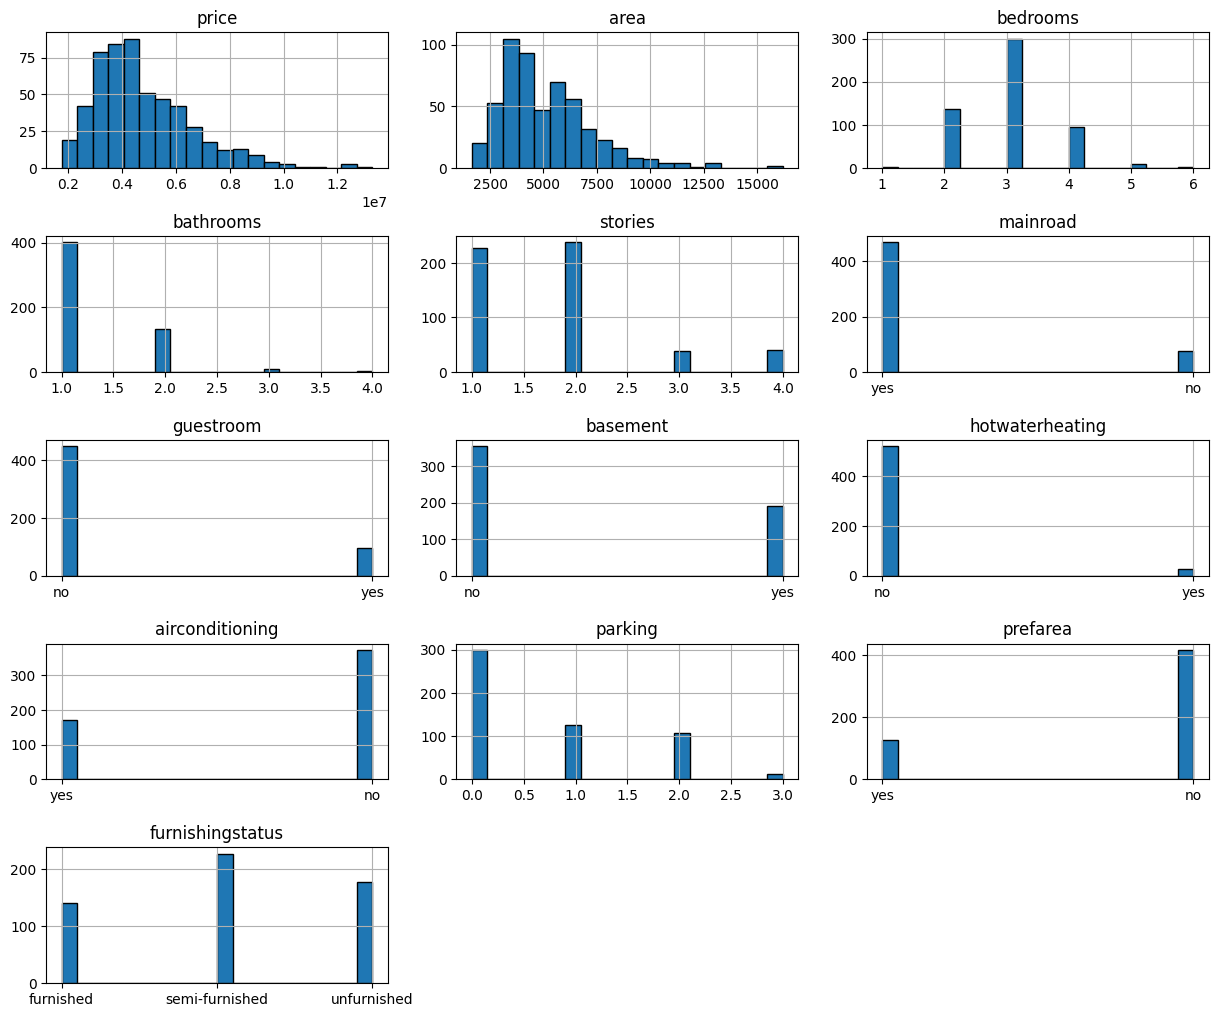

In [13]:
show_subplots(len(df.columns))

## 5. Clean and prepare data

### 5.1 Replacing the string value with numerical values

In [14]:
# Replaces the string values 'no' and 'yes' in the 'Mainroad' column with 0 and 1
df['mainroad'].replace({'no': 0, 'yes': 1},inplace = True)

# Replaces the string values 'no' and 'yes' in the 'Guestroom' column with 0 and 1
df['guestroom'].replace({'no': 0, 'yes': 1},inplace = True)

# Replaces the string values 'no' and 'yes' in the 'Basement' column with 0 and 1
df['basement'].replace({'no': 0, 'yes': 1},inplace = True)

# Replaces the string values 'no' and 'yes' in the 'Hotwaterheating' column with 0 and 1
df['hotwaterheating'].replace({'no': 0, 'yes': 1},inplace = True)

# Replaces the string values 'no' and 'yes' in the 'Airconditioning' column with 0 and 1
df['airconditioning'].replace({'no': 0, 'yes': 1},inplace = True)

# Replaces the string values 'no' and 'yes' in the 'Prefarea' column with 0 and 1
df['prefarea'].replace({'no': 0, 'yes': 1},inplace = True)

### 5.2 Reshaping the furnishing status for the OneHotEncoder in the next step

In [15]:
furnishing_status = df['furnishingstatus'].values.reshape(-1, 1)

### 5.3 Using the `OneHotEncoder` for the categorical labels

In [16]:
# Created instance of the OneHotEncoder class
encoder = OneHotEncoder(handle_unknown='ignore')

# Encoded the 'furnishingstatus' column stored the result in a new dataframe 'enc_df'
enc_df = pd.DataFrame(encoder.fit_transform(df[['furnishingstatus']]).toarray())

# Replaces the encoded column names with the original category names
category_names = encoder.categories_[0]
enc_df.columns = category_names

# Join the encoded dataframe 'enc_df' to the original 'df' dataframe
df = df.join(enc_df)

# Removing the 'furnishingstatus column from the data
df = df.drop(columns=['furnishingstatus'], axis=1)

### 5.4 Displaying the first 10 rows

In [17]:
# Shows the first n (10) rows for the object based on position
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0,0.0,0.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0,0.0,0.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.0,1.0,0.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0,0.0,0.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0,0.0,0.0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,0.0,1.0,0.0
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,0.0,1.0,0.0
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0.0,0.0,1.0
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,1.0,0.0,0.0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0.0,0.0,1.0


### 5.4 Split Data into Train, Test

In [18]:
# Contains the features to train on
X = df.drop(['price'], axis=1)

# Contains the target variable
y = df['price'].values

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

## 6. RP Visualize data 
    RP = repeating
    (repeating after cleaning and preparing data)

### 6.1 Displaying the subplots of the dataframe

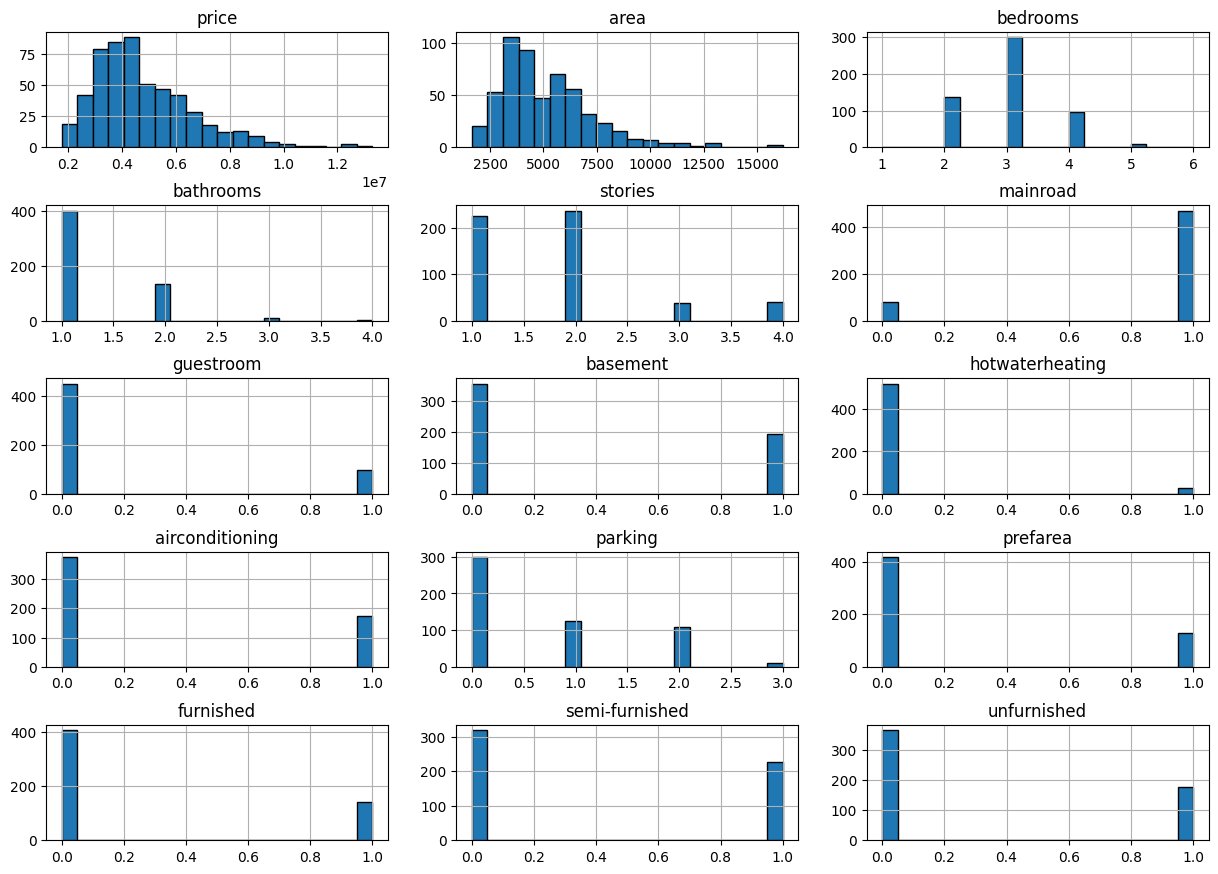

In [20]:
show_subplots(len(df.columns))

### 6.2 Correlation matrix 

Correlation matrix to visualize the correlation between variables. If there are outliers, they will appear as variables with low correlation with other variables.

In [21]:
# calculate the correlation matrix
corr_matrix = df.corr()

print(corr_matrix)

                    price      area  bedrooms  bathrooms   stories  mainroad  \
price            1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area             0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms         0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms        0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories          0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad         0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom        0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement         0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating  0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning  0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking          0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefarea         0.329777  0.234779  0.0

### 6.3 Heatmap 

Heatmap to explore the relationship between variables.

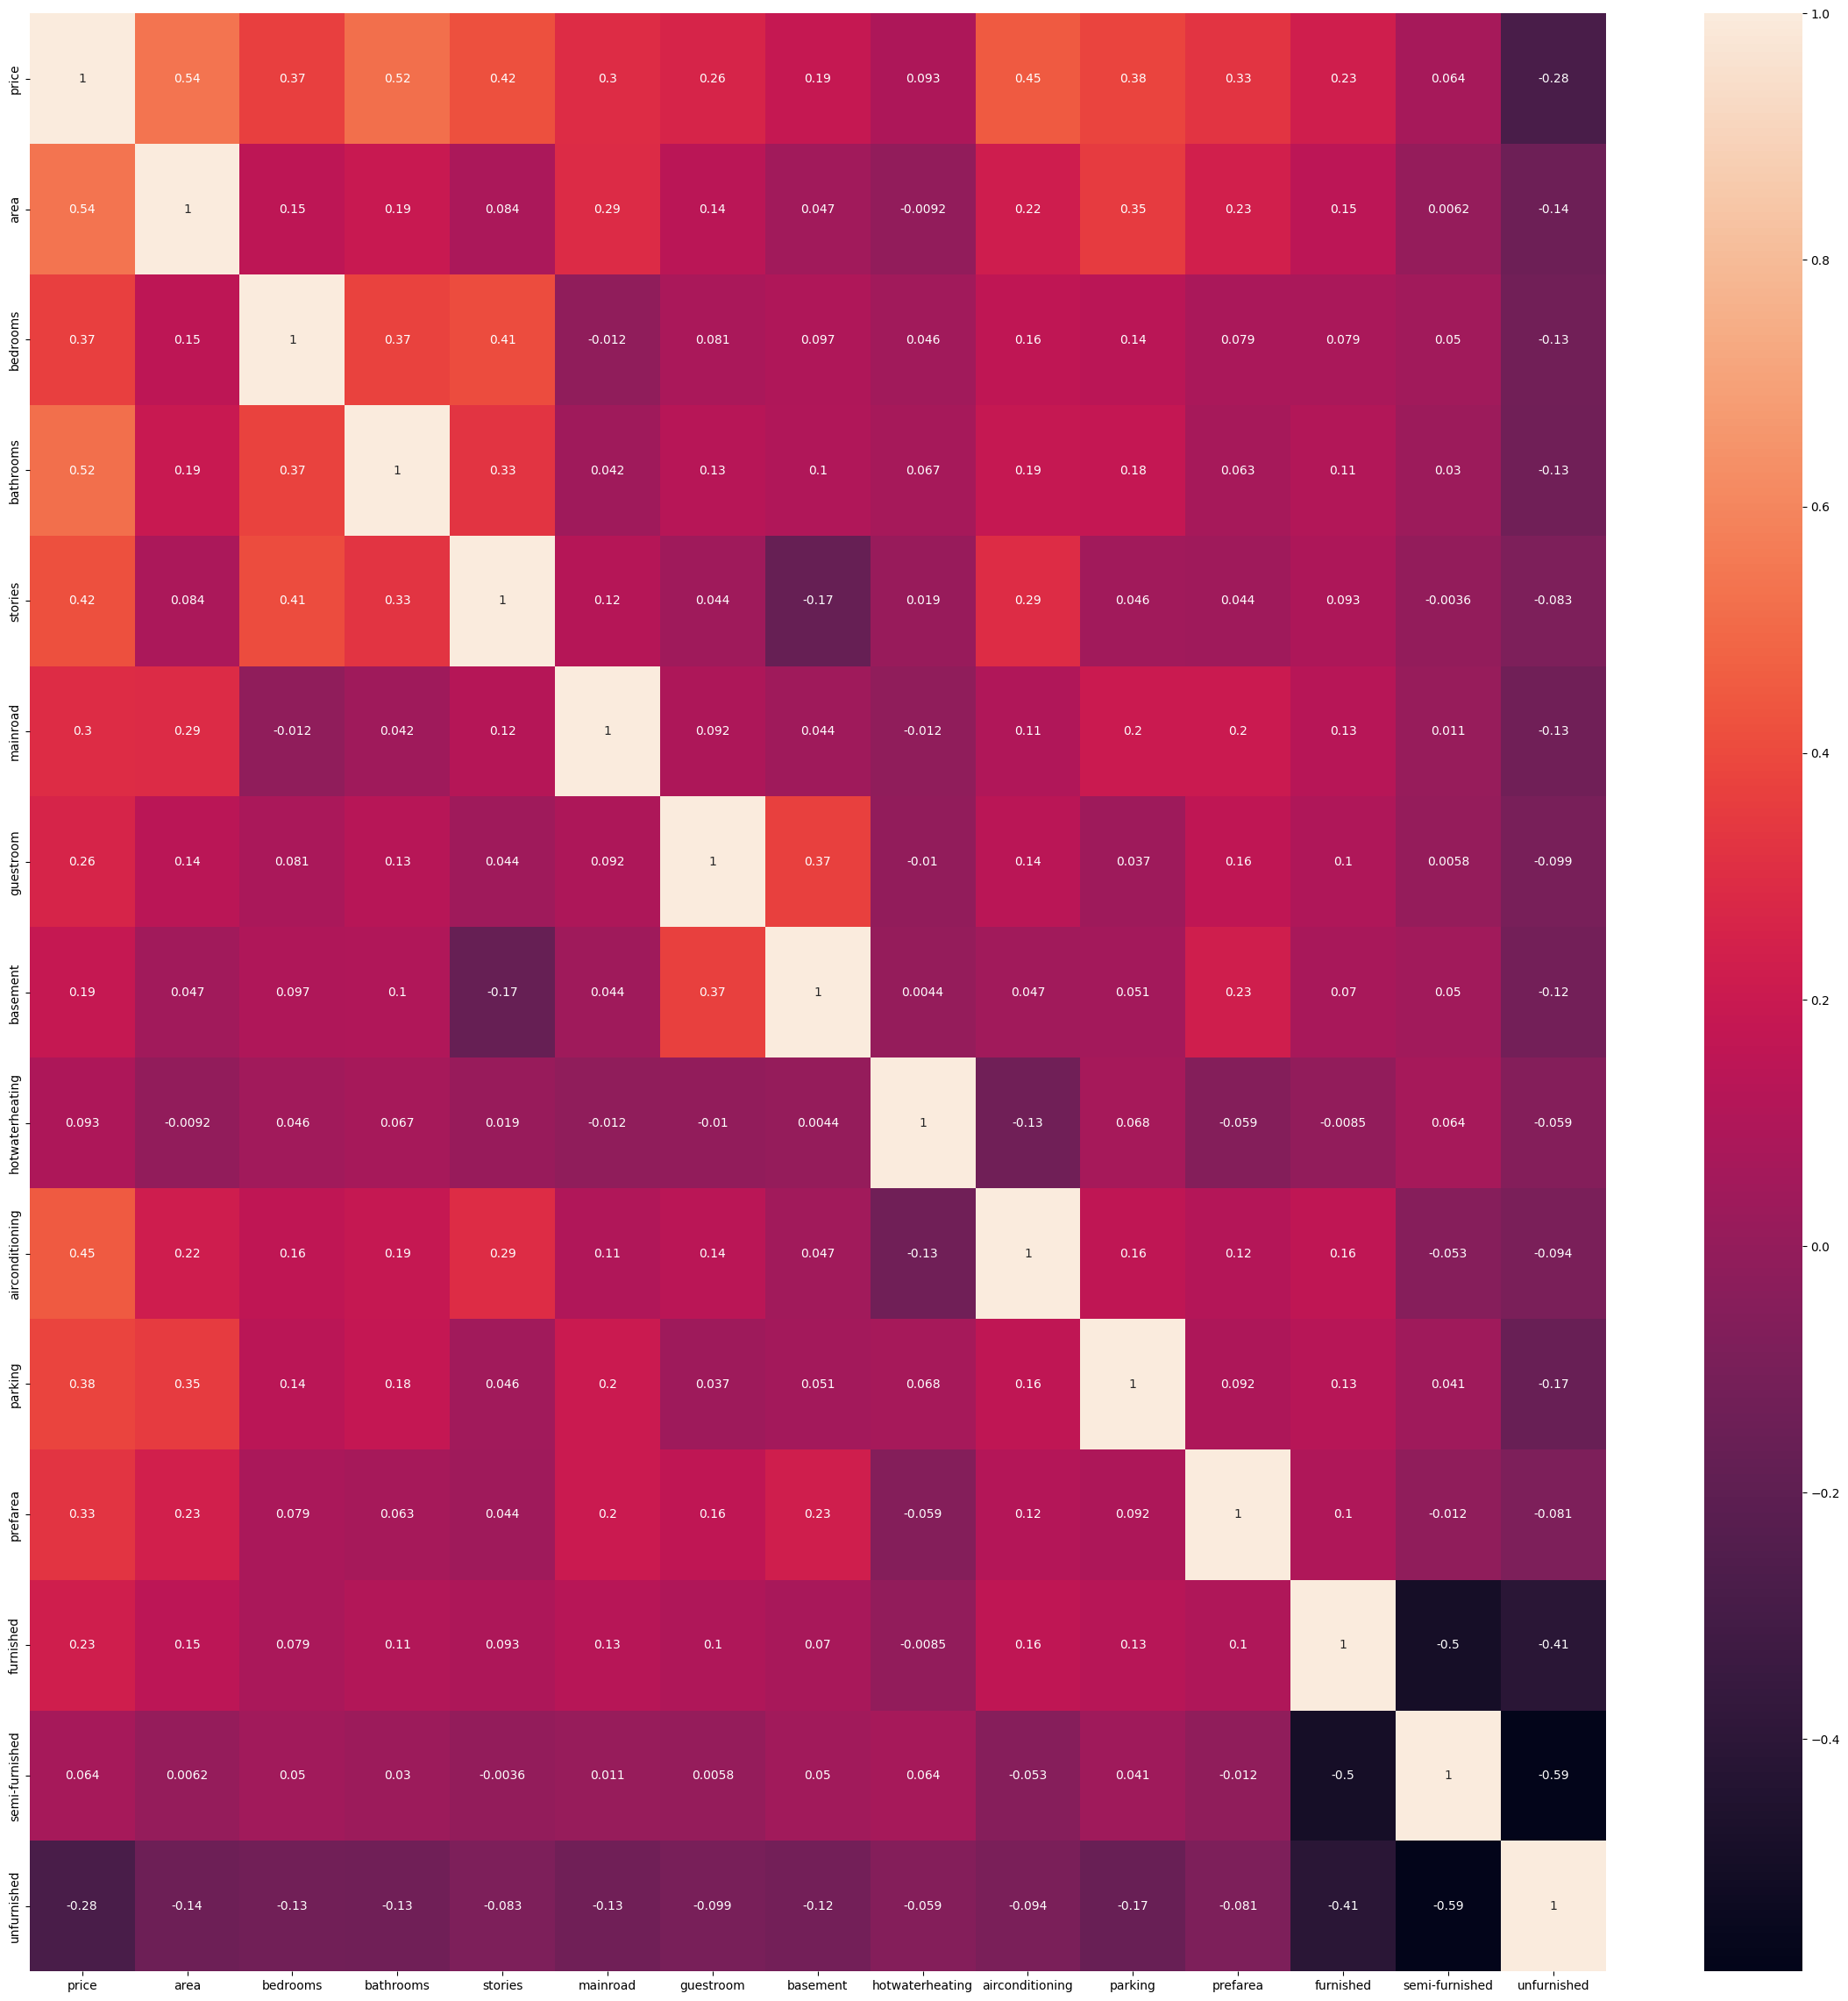

In [22]:
plt.figure(figsize=(29, 29))
sns.heatmap(corr_matrix, annot=True)
plt.show()

## 7-`LR`. Select and set model

In [23]:
# Created a linear regression object
lr = LinearRegression() 

## 7-`DTR`. Select and set model

In [24]:
# maximum depth of the tree is set to 4 using the max_depth hyperparameter.This parameter controls the depth of the decision tree.
dtr = DecisionTreeRegressor(max_depth=4, random_state=42)

## 8-`LR`. Train and test model

In [25]:
# Training the linear regression model using the training data
lr.fit(X_train,y_train) 

# Making predictions on the test data using the trained linear regression model
y_pred_lr = lr.predict(X_test)  

## 8-`DTR`. Train and test model

In [26]:
# Training the Decision Tree Regressor model using the training data
dtr.fit(X_train, y_train)

# Making predictions on the test data using the trained Decision Tree Regressor model
y_pred_dtr = dtr.predict(X_test)  

## 9. Improve model 

    (Notes of what I have changed)

### 9.1 Linear Regression

### 9.2 Decision Tree Regression

- Performed a grid search on the DecisionTreeRegressor to find the best hyperparameters values. I have performed this at section '9-`DTR`. Evaluate Results' at the second code block.

## 10-`LR`. Evaluate results

### 10.1-`LR` R2-Score

Evaluate the performance on the testing data using the R-squared score. This score measures how well the model fits the data.

Score of 1.0 = perfect fit and score of 0.0 = not fit at all.

In [27]:
# Calculates the R-squared score of the linear regression model on the test data
r_score_lr = r2_score(y_test, y_pred_lr)

print(r_score_lr)

0.6529242642153185


### 10.2-`LR` MSE 

In [28]:
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(mse_lr)

1754318687330.6633


Evaluating the performance of the LinearRegressor model using 7-fold cross validation. The cross_val_score function returns the array of scores for each fold of the cross validation

### 10.3-`LR` Cross-validation

In [29]:
score_evaluation_lr = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=7)

print(score_evaluation_lr)
print(score_evaluation_lr.mean())

[0.57717336 0.69713786 0.59503658 0.49309155 0.69906283 0.67045081
 0.49559486]
0.6039354064157415


### 10.4-`LR` Coefficients

The larger the value of the coeff, the more impact it has on the target variable.

In [30]:
coefficients = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])

In [31]:
coefficients = coefficients.sort_values('Coefficient', ascending=True)

print(coefficients)

                  Coefficient
unfurnished     -2.334694e+05
area             2.359688e+02
semi-furnished   5.329381e+04
bedrooms         7.677870e+04
furnished        1.801756e+05
parking          2.248419e+05
guestroom        2.316100e+05
mainroad         3.679199e+05
basement         3.902512e+05
stories          4.074766e+05
prefarea         6.298906e+05
hotwaterheating  6.846499e+05
airconditioning  7.914267e+05
bathrooms        1.094445e+06


### 10.5-`LR` Scatter plot

Comparing the values ​​of the predictions with the values ​​of y_test. For the comparison I am using a scatter plot.

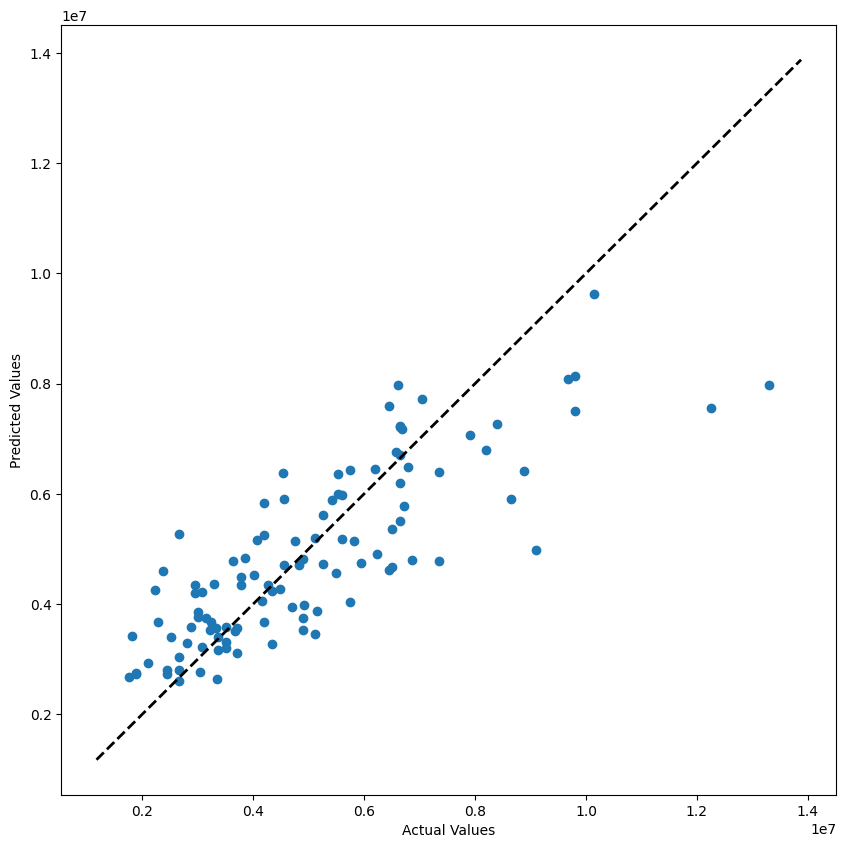

In [32]:
# Plotting the scatter plot
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

"""
Adds regression line with dashed line and a linewidth of 2.
.xlim() returns the x-limits of the current axes.
Resource used: https://www.geeksforgeeks.org/matplotlib-pyplot-xlim-in-python/
"""
xmin, xmax = plt.xlim()
plt.plot([xmin, xmax], [xmin, xmax], 'k--', lw=2)
plt.show()

### 10.6-`LR` Kernel Density Estimate (KDE) 

assessing the performance of the model (the difference between the actual y values ​​and the predicted y values)

<Axes: ylabel='Density'>

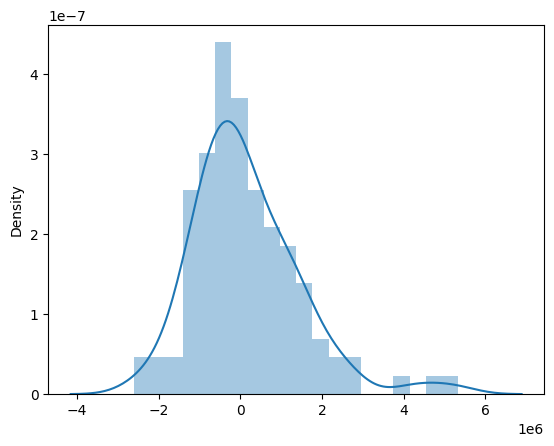

In [33]:
sns.distplot((y_test-y_pred_lr),bins=20)

## 10-`DTR`. Evaluate results

### 10.1-`DTR` R2-Score

Evaluate the performance on the testing data using the R-squared score. This score measures how well the model fits the data.

Score of 1.0 = perfect fit and score of 0.0 = not fit at all.

In [34]:
# Calculates the R-squared score of the Decision Tree Regressor model on the test data
r_score_dtr = r2_score(y_test, y_pred_dtr)

print(r_score_dtr)

0.40610296357479847


### 10.2-`DTR` MSE

In [35]:
mse_dtr = mean_squared_error(y_test, y_pred_dtr)

print(mse_dtr)

3001894289716.0464


### 10.3-`DTR` Cross-validation

Evaluating the performance of the DecisionTreeRegressor model using 7-fold cross validation. The cross_val_score function returns the array of scores for each fold of the cross validation

In [36]:
score_evaluation_dtr = cross_val_score(estimator=dtr, X=X_train, y=y_train, cv=7)

print(score_evaluation_dtr)
print(score_evaluation_dtr.mean())

[-0.20024633  0.56242438  0.37144739  0.39792104  0.62768011  0.52271723
  0.11816122]
0.3428721491740501


### 10.4-`DTR` GridSearch

Performing a GridSearch on the DecisionTreeRegressor model (dtr) to find the best hyperparameters values for the model.

In [37]:
# Params which can be used: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html 
param_dtr = {
    'splitter': ['best'], 
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [1, 3, 5, 7],
    'max_leaf_nodes': [5, 10, 15, None],
    }

grid_search_dtr = GridSearchCV(estimator = dtr, param_grid = param_dtr, cv = 7, n_jobs = 1)
grid_search_dtr.fit(X_train, y_train)

print(grid_search_dtr.best_params_)
print(grid_search_dtr.best_score_)

{'max_depth': 5, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'splitter': 'best'}
0.5257494214630196


### 10.5-`DTR` Decision Tree plot

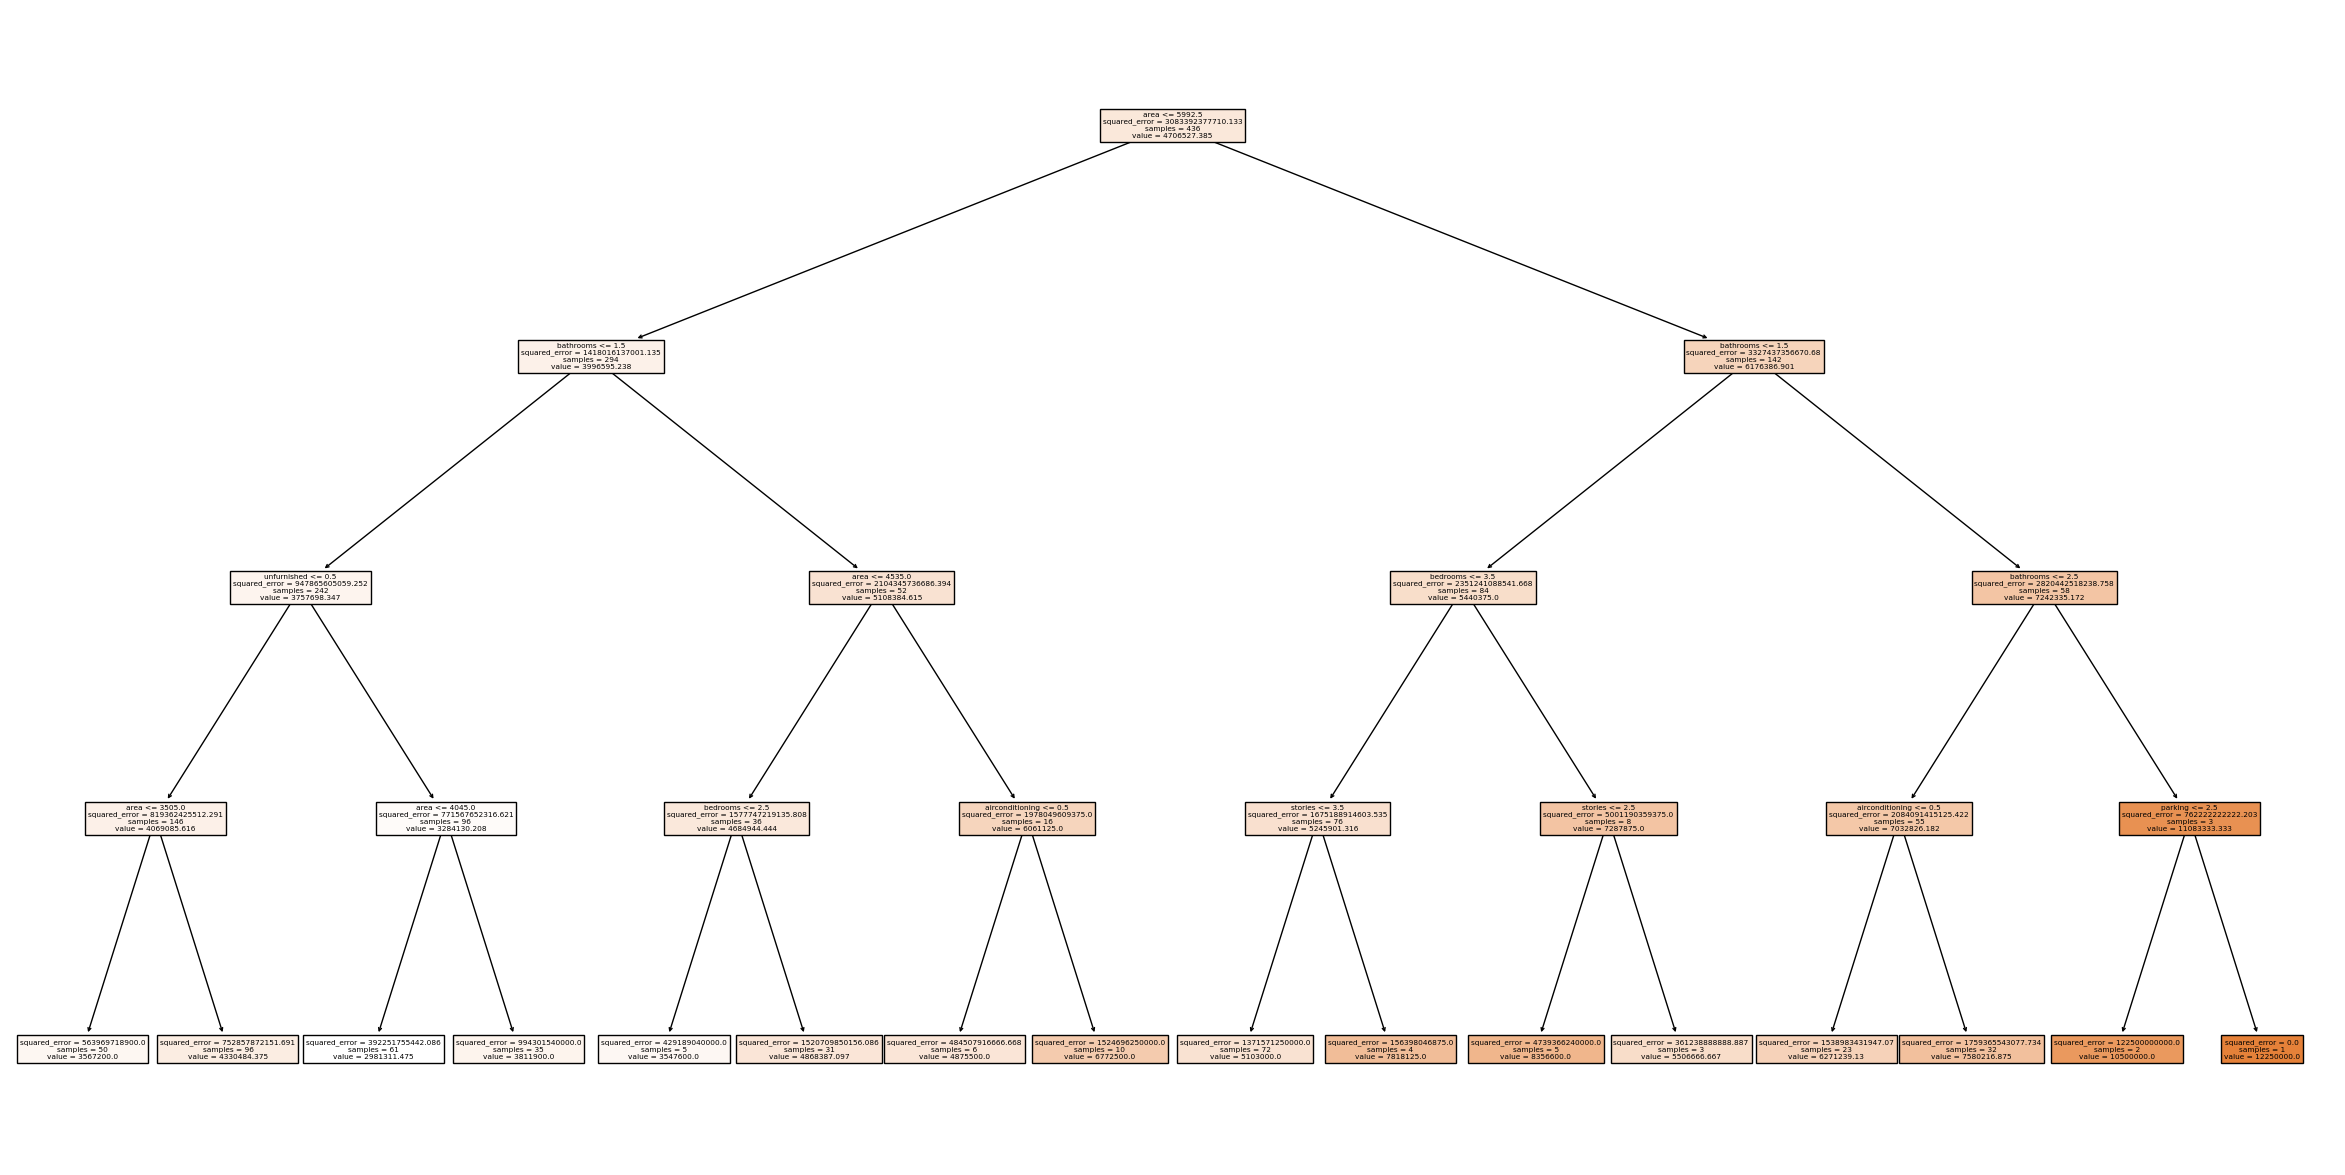

In [38]:
from sklearn import tree

fig = plt.figure(figsize = (30, 15))
Plot = tree.plot_tree (dtr, feature_names = X.columns, class_names = y, filled = True)

## 11. Overall comparison

In [39]:
results = pd.DataFrame({'Model': ['Linear Regression', 'Decision Tree'],
                        'R-squared': [r_score_lr, r_score_dtr],
                        'MSE': [mse_lr, mse_dtr],
                        'Cross-validation-score mean': [score_evaluation_lr.mean(), score_evaluation_dtr.mean()]})

print(results)

               Model  R-squared           MSE  Cross-validation-score mean
0  Linear Regression   0.652924  1.754319e+12                     0.603935
1      Decision Tree   0.406103  3.001894e+12                     0.342872


## 12. Conclusion

After analyzing the 'housing price' dataset, I chose to use 2 models. The first model i used was the Linear Regression model and the second one was the Decision Tree Regressor model.

The first thing I did was to look for 0, NaN and null values. After I had viewed all my data and performed my checks, I was able to view my data better and see what still needed to be done in terms of cleaning and pre-processing.

The results show that the Linear Regression model achieved a better performance than Decision Tree Regressor model. The R-squared score for the Decision Tree model was 0.406103, while the R-squared score for the Linear Regression model was 0.652924. If I only take these scores I can say that the Linear Regression model is a better model then the Decision Tree model

But when we look at the MSE (Mean squared error) score of both models we can see these are very very high for both models. The large MSE score indicates that the models are not accurately predicting the target variable.
